Preparación datos de Accidentes de tránsito en CABA:
--Consultas sobre 3 KPIs

In [525]:
# Importar librerías
import pandas as pd
import numpy as np
import requests
import csv

import matplotlib.pyplot as plt

In [526]:
# Abrir archivos
df_muertes = pd.read_excel(r'DataBase/victimas.xlsx')

In [527]:
# Guarda los datos en un archivo CSV
df_muertes.to_csv(r'Tablas_realizadas/muertes.csv', index=False)

In [528]:
# Abrir archivos
df_hechos_m = pd.read_excel(r'DataBase/hechos.xlsx')

In [529]:
# Guarda los datos en un archivo CSV
df_hechos_m.to_csv(r'Tablas_realizadas/df_hechos_m.csv', index=False)

In [530]:
# Abrir archivos
df_heridos = pd.read_excel(r'DataBase/victimas.xlsx')

In [531]:
# Guarda los datos en un archivo CSV
df_heridos.to_csv(r'Tablas_realizadas/df_heridos.csv', index=False)

In [532]:
# Abrir archivos como .csv (no estaban funcionando bien como hoja excel)
df_muertes = pd.read_csv(r'Tablas_realizadas/muertes.csv')
df_hechos_m = pd.read_csv(r'Tablas_realizadas/df_hechos_m.csv')
df_heridos = pd.read_csv(r'Tablas_realizadas/df_heridos.csv')
df_poblacion = pd.read_csv(r'Tablas_realizadas/PobCABA.csv')

In [533]:
df_muertes.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [534]:
# No coincide con dataframe de hechos
df_muertes

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
4,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29,2016-01-26 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2017-0089,2017-07-13,2017,7,13,SD,SD,MASCULINO,23,SD
713,2017-0112,2017-09-10,2017,9,10,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,1,SD
714,2017-0115,2017-09-19,2017,9,19,CONDUCTOR,MOTO,MASCULINO,34,SD
715,2017-0126,2017-10-14,2017,10,14,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,39,SD


In [535]:
df_hechos_m.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO'],
      dtype='object')

In [536]:
df_hechos_m

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,AVENIDA,...,NaN,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,AVENIDA,...,NaN,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2021-0093,1,2021-12-13,2021,12,13,17:10:00,17,AV. RIESTRA Y MOM,AVENIDA,...,NaN,MOM,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.43353773,-34.64561636,MOTO-AUTO,MOTO,AUTO
692,2021-0094,1,2021-12-20,2021,12,20,01:10:00,1,AU DELLEPIANE Y LACARRA,AUTOPISTA,...,NaN,LACARRA AV.,"DELLEPIANE, LUIS, TTE. GRAL. y LACARRA AV.",9,Point (99624.29795829 97569.69801131),-58.46739825,-34.65117757,MOTO-AUTO,MOTO,AUTO
693,2021-0095,1,2021-12-30,2021,12,30,00:43:00,0,AV. GAONA Y TERRADA,AVENIDA,...,NaN,TERRADA,GAONA AV. y TERRADA,11,Point (99116.45492358 101045.23284826),-58.47293407,-34.61984745,MOTO-CARGAS,MOTO,CARGAS
694,2021-0096,1,2021-12-15,2021,12,15,10:30:00,10,AV. EVA PERON 4071,AVENIDA,...,4071.0,NaN,"PERON, EVA AV. 4071",9,Point (99324.54463985 97676.26932409),-58.47066794,-34.65021673,AUTO-CARGAS,AUTO,CARGAS


In [537]:
df_heridos.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO'],
      dtype='object')

In [538]:
df_heridos

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00
3,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00
4,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29,2016-01-26 00:00:00
...,...,...,...,...,...,...,...,...,...,...
712,2017-0089,2017-07-13,2017,7,13,SD,SD,MASCULINO,23,SD
713,2017-0112,2017-09-10,2017,9,10,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,1,SD
714,2017-0115,2017-09-19,2017,9,19,CONDUCTOR,MOTO,MASCULINO,34,SD
715,2017-0126,2017-10-14,2017,10,14,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,39,SD


In [539]:
df_poblacion.columns

Index(['Año;Número habitantes CABA'], dtype='object')

In [540]:
# Convertir la columna 'FECHA' de df_muertes al formato datetime
df_muertes['FECHA'] = pd.to_datetime(df_muertes['FECHA'], errors='coerce')

In [541]:
# Obtener el año y el semestre a partir de la columna 'FECHA'
df_muertes['AAAA'] = df_muertes['FECHA'].dt.year
df_muertes['Semestre'] = df_muertes['FECHA'].dt.year.astype(str) + '-' + ((df_muertes['FECHA'].dt.month - 1) // 6 + 1).astype(str)

In [542]:
# Crea una nueva columna que contenga el año de cada registro
df_poblacion['Año'] = df_poblacion['Año;Número habitantes CABA'].str.split(';').str[0]

In [543]:
# Separa la columna "Año;Número habitantes CABA" en dos columnas distintas, utilizando el separador ";".
df_poblacion[['Año', 'Número habitantes CABA']] = df_poblacion['Año;Número habitantes CABA'].str.split(';', expand=True)

In [544]:
# Elimina la columna "Año;Número habitantes CABA"
df_poblacion.drop(columns=['Año;Número habitantes CABA'], inplace=True)

In [545]:
# Visualiza los datos por año
df_poblacion

,Año,Número habitantes CABA
0,2016,3059122
1,2017,3063728
2,2018,3068043
3,2019,3072029
4,2020,3075646
5,2021,3078836


Población CABA
Año Número habitantes CABA Habitantes país
2016	3059122	43590000
2017	3063728	44045000
2018	3068043	44495000
2019	3072029	44939000
2020	3075646	45376763
2021	3078836	45808747
PROM	3069567	
Extraído desde https://data.buenosaires.gob.ar/dataset/estructura-poblacion

In [546]:
# Crea un diccionario que mapee cada año a su población correspondiente
poblacion_por_año = {
    2016: 3059122,
    2017: 3063728,
    2018: 3068043,
    2019: 3072029,
    2020: 3075646,
    2021: 3078836
}

In [547]:
# Define una función personalizada para insertar la población correspondiente en la columna "Población"
def insertar_poblacion(row):
    año = row['AAAA']
    poblacion = poblacion_por_año.get(año)
    if poblacion is not None:
        row['Población'] = poblacion
    return row

# Aplica la función personalizada a cada fila del DataFrame
df_hechos_m = df_hechos_m.apply(insertar_poblacion, axis=1)

In [548]:
df_hechos_m.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'Población'],
      dtype='object')

In [549]:
# Se utiliza la Fecha de Fallecimiento, ya que los heridos de comienzo pueden fallecer (y necesitamos "fallecidos")
df_heridos['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_heridos['FECHA_FALLECIMIENTO'], errors='coerce')

In [550]:
# Se extrae el Año de Fallecimiento, contabilizado como muerte
df_heridos['Año_F'] = df_heridos['FECHA_FALLECIMIENTO'].dt.year

In [551]:
df_heridos

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,Año_F
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,2016.0
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,2016.0
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,2016.0
3,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24,2016.0
4,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29,2016-01-26,2016.0
...,...,...,...,...,...,...,...,...,...,...,...
712,2017-0089,2017-07-13,2017,7,13,SD,SD,MASCULINO,23,NaT,NaN
713,2017-0112,2017-09-10,2017,9,10,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,1,NaT,NaN
714,2017-0115,2017-09-19,2017,9,19,CONDUCTOR,MOTO,MASCULINO,34,NaT,NaN
715,2017-0126,2017-10-14,2017,10,14,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,39,NaT,NaN


In [552]:
# Obtener el año y el semestre a partir de la columna 'FECHA_FALLECIMIENTO', ya que nos piden diferencia de tasa semestral
df_heridos['Semestre'] = df_heridos['FECHA_FALLECIMIENTO'].dt.year.astype(str) + '-' + ((df_heridos['FECHA_FALLECIMIENTO'].dt.month - 1) // 6 + 1).astype(str)

In [553]:
# Crea una función que devuelve 1 si hay una fecha en la fila y 0 si no
def fallecido(row):
    if pd.isna(row['FECHA_FALLECIMIENTO']):
        return 0
    else:
        return 1

# Aplica la función a cada fila de la columna "FECHA_FALLECIMIENTO" y crea una nueva columna "Fallecido"
df_heridos['Fallecido'] = df_heridos.apply(fallecido, axis=1)

In [554]:
df_heridos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    object        
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   ROL                  717 non-null    object        
 6   VICTIMA              717 non-null    object        
 7   SEXO                 717 non-null    object        
 8   EDAD                 717 non-null    object        
 9   FECHA_FALLECIMIENTO  648 non-null    datetime64[ns]
 10  Año_F                648 non-null    float64       
 11  Semestre             717 non-null    object        
 12  Fallecido            717 non-null    int64         
dtypes: datetime64[ns](1), float64(1), i

In [555]:
df_heridos.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO', 'Año_F', 'Semestre', 'Fallecido'],
      dtype='object')

In [556]:
df_heridos

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,Año_F,Semestre,Fallecido
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01,2016.0,2016.0-1.0,1
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,2016-01-02,2016.0,2016.0-1.0,1
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03,2016.0,2016.0-1.0,1
3,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24,2016.0,2016.0-1.0,1
4,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29,2016-01-26,2016.0,2016.0-1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
712,2017-0089,2017-07-13,2017,7,13,SD,SD,MASCULINO,23,NaT,NaN,nan-nan,0
713,2017-0112,2017-09-10,2017,9,10,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,1,NaT,NaN,nan-nan,0
714,2017-0115,2017-09-19,2017,9,19,CONDUCTOR,MOTO,MASCULINO,34,NaT,NaN,nan-nan,0
715,2017-0126,2017-10-14,2017,10,14,PASAJERO_ACOMPAÑANTE,AUTO,MASCULINO,39,NaT,NaN,nan-nan,0


In [557]:
# Semestre con NaN
df_heridos["Semestre"].unique()

array(['2016.0-1.0', '2016.0-2.0', '2017.0-1.0', '2017.0-2.0',
       '2018.0-1.0', '2018.0-2.0', '2019.0-1.0', '2019.0-2.0',
       '2020.0-1.0', '2020.0-2.0', '2021.0-1.0', '2021.0-2.0',
       '2022.0-1.0', 'nan-nan'], dtype=object)

In [558]:
df_heridos.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO', 'Año_F', 'Semestre', 'Fallecido'],
      dtype='object')

In [559]:
# Cuántos nulos existen
nulos = df_heridos.isnull().sum()

In [560]:
nulos

ID_hecho                0
FECHA                   0
AAAA                    0
MM                      0
DD                      0
ROL                     0
VICTIMA                 0
SEXO                    0
EDAD                    0
FECHA_FALLECIMIENTO    69
Año_F                  69
Semestre                0
Fallecido               0
dtype: int64

In [561]:
# Reemplaza los valores nulos en el dataframe con 0
df_heridos.fillna(0, inplace=True)

In [562]:
# Una descripción estadística, no nos sirve más que el número de fallecidos ("Fallecido"), son 717
df_heridos.describe()

,AAAA,MM,DD,Año_F,Fallecido
count,717.000000,717.000000,717.000000,717.000000,717.000000
mean,2018.174338,6.688982,15.960948,1824.160391,0.903766
std,1.672655,3.575140,8.683358,595.668411,0.295118
min,2016.000000,1.000000,1.000000,0.000000,0.000000
25%,2017.000000,4.000000,9.000000,2017.000000,1.000000
50%,2018.000000,7.000000,16.000000,2018.000000,1.000000
75%,2019.000000,10.000000,23.000000,2019.000000,1.000000
max,2021.000000,12.000000,31.000000,2022.000000,1.000000


In [563]:
# Eliminar las filas que contienen valores no válidos en la columna "Semestre"
df_heridos = df_heridos.replace("nan-nan", np.nan).dropna(subset=["Semestre"])

In [564]:
df_heridos = df_heridos.dropna(subset=["Semestre"])

In [565]:
# Crear una nueva columna "Año" que contenga solo el año de cada semestre
df_heridos["Año"] = df_heridos["Semestre"].apply(lambda x: int(x.split(".")[0]))

In [566]:
# Convertir la columna "Semestre" en una matriz de números
df_heridos["Semestre"] = df_heridos["Semestre"].apply(lambda x: float(x.split("-")[0]) + float(x.split("-")[1])/10)

In [567]:
# Unimos dataframes para encontrar Población con los datos
new_df_pobl = pd.concat([df_hechos_m, df_heridos], axis=1)

In [568]:
new_df_pobl.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'Población', 'ID_hecho', 'FECHA',
       'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'Año_F', 'Semestre', 'Fallecido', 'Año'],
      dtype='object')

In [569]:
# Calcular la tasa de mortalidad para cada semestre
new_df_pobl["TMA"] = new_df_pobl["Fallecido"] / new_df_pobl["Población"] * 100000

Primera KPI:

In [570]:
# Usar el método pivot_table para agrupar los datos por año y semestre
df_KPI1 = new_df_pobl.pivot_table(index=["Año_F", "Semestre", "Población"], values=["Fallecido", "TMA"], aggfunc="sum").reset_index()

In [571]:
# Filtrar las filas que contienen valores nulos
df_KPI1 = df_KPI1.dropna()

In [572]:
# Mostrar el DataFrame resultante
df_KPI1

,Año_F,Semestre,Población,Fallecido,TMA
0,2016.0,2016.1,3059122,43.0,1.405632
1,2016.0,2016.2,3059122,40.0,1.307565
2,2017.0,2017.1,3059122,61.0,1.994036
3,2017.0,2017.1,3063728,8.0,0.261120
4,2017.0,2017.2,3063728,66.0,2.154238
5,2018.0,2018.1,3063728,57.0,1.860478
6,2018.0,2018.1,3068043,12.0,0.391129
7,2018.0,2018.2,3068043,79.0,2.574931
8,2019.0,2019.1,3068043,52.0,1.694891
9,2019.0,2019.1,3072029,5.0,0.162759


In [573]:
# Cambio porcentual por Semestre
df_KPI1.loc[:, "Cambio_Porcentual"] = df_KPI1["TMA"].pct_change() * 100

In [574]:
# Semestre 1 y 2, Fallecidos, Población de acuerdo a los años, Tasa Muertes por Accidentes y Cambio porcentual semestral
df_KPI1

,Año_F,Semestre,Población,Fallecido,TMA,Cambio_Porcentual
0,2016.0,2016.1,3059122,43.0,1.405632,NaN
1,2016.0,2016.2,3059122,40.0,1.307565,-6.976744
2,2017.0,2017.1,3059122,61.0,1.994036,52.500000
3,2017.0,2017.1,3063728,8.0,0.261120,-86.904963
4,2017.0,2017.2,3063728,66.0,2.154238,725.000000
5,2018.0,2018.1,3063728,57.0,1.860478,-13.636364
6,2018.0,2018.1,3068043,12.0,0.391129,-78.976978
7,2018.0,2018.2,3068043,79.0,2.574931,558.333333
8,2019.0,2019.1,3068043,52.0,1.694891,-34.177215
9,2019.0,2019.1,3072029,5.0,0.162759,-90.397091


In [575]:
df_KPI1['Año_F'] = df_KPI1['Año_F'].astype(str)
df_KPI1['Semestre'] = df_KPI1['Semestre'].astype(str)

In [576]:
df_KPI1['Año_F'] = df_KPI1['Año_F'].str.rstrip('0')

In [577]:
df_KPI1['Año_F'] = df_KPI1['Año_F'].str.rstrip('.')

In [578]:
# Para saber en qué meses se cumplió con el KPI número 1, "Reducción en 10% de la Tasa de Fallecidos en Accidentes de los últimos
# 6 meses en CABA, comparado con el semestre anterior". El 2022 no debe considerarse porque no hay más datos (n=2).
df_KPI1[df_KPI1["Cambio_Porcentual"]<-10].reset_index()

,index,Año_F,Semestre,Población,Fallecido,TMA,Cambio_Porcentual
0,3,2017,2017.1,3063728,8.0,0.261120,-86.904963
1,5,2018,2018.1,3063728,57.0,1.860478,-13.636364
2,6,2018,2018.1,3068043,12.0,0.391129,-78.976978
3,8,2019,2019.1,3068043,52.0,1.694891,-34.177215
4,9,2019,2019.1,3072029,5.0,0.162759,-90.397091
5,11,2020,2020.1,3072029,31.0,1.009105,-34.042553
6,12,2020,2020.2,3072029,20.0,0.651036,-35.483871
7,15,2021,2021.1,3078836,7.0,0.227359,-85.729087
8,17,2022,2022.1,3078836,2.0,0.064960,-95.000000


Se muestra en esta 1ra KPI, el cambio porcentual existente entre semestres, en cuanto a la Tasa de Fallecidos por Accidentes
de tránsito por cada 100.000 habitantes.
Se pide la reducción en 10% de esta Tasa, las cuales se cumplen a cabalidad.
Se toma el año 2021 con sus 2 semestres, ya que el 2022 cuenta con solo dos datos.

In [579]:
# Guarda los datos en un archivo CSV
df_KPI1.to_csv('dfKPI1.csv', index=False)

Segunda KPI:

In [580]:
# Filtrar los datos para obtener los accidentes fatales con víctimas en moto por año en CABA
# Segunda KPI: Reducción del 7% en la cantidad de accidentes fatales de motociclistas en el último año (2021-2020).
condiciones = (df_heridos['VICTIMA'] == 'MOTO')
df_motos = df_heridos[condiciones].copy()

In [581]:
# Se escogen solamente los accidentados en moto (fallecidos)
df_motos

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO,Año_F,Semestre,Fallecido,Año
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,2016-01-01 00:00:00,2016.0,2016.1,1,2016
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,2016-01-03 00:00:00,2016.0,2016.1,1,2016
3,2016-0008,2016-01-24,2016,1,24,CONDUCTOR,MOTO,MASCULINO,30,2016-01-24 00:00:00,2016.0,2016.1,1,2016
4,2016-0009,2016-01-24,2016,1,24,PASAJERO_ACOMPAÑANTE,MOTO,MASCULINO,29,2016-01-26 00:00:00,2016.0,2016.1,1,2016
5,2016-0010,2016-01-29,2016,1,29,CONDUCTOR,MOTO,MASCULINO,18,2016-01-29 00:00:00,2016.0,2016.1,1,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
640,2021-0089,2021-12-02,2021,12,2,CONDUCTOR,MOTO,MASCULINO,41,2021-12-11 00:00:00,2021.0,2021.2,1,2021
641,2021-0091,2021-12-11,2021,12,11,CONDUCTOR,MOTO,MASCULINO,24,2021-12-11 00:00:00,2021.0,2021.2,1,2021
643,2021-0093,2021-12-13,2021,12,13,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,18,2021-12-18 00:00:00,2021.0,2021.2,1,2021
644,2021-0094,2021-12-20,2021,12,20,PASAJERO_ACOMPAÑANTE,MOTO,FEMENINO,43,2021-12-20 00:00:00,2021.0,2021.2,1,2021


In [582]:
# Unimos dataframes para encontrar Fallecido con los datos
new_df_moto = pd.concat([df_motos, df_hechos_m], axis=1)

In [583]:
# Ver nombres de columnas
new_df_moto.columns

Index(['ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO',
       'EDAD', 'FECHA_FALLECIMIENTO', 'Año_F', 'Semestre', 'Fallecido', 'Año',
       'ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'Población'],
      dtype='object')

In [584]:
# Agrupar por año y calcular el número de accidentes mortales con víctimas en moto
accidentes_por_agno = new_df_moto.groupby('Año_F')['Fallecido'].sum().reset_index()

In [585]:
new_df_moto[['Año_F']] = new_df_moto[['Año_F']].astype(str)

In [586]:
new_df_moto['Año_F'] = new_df_moto['Año_F'].str.rstrip('0')

In [587]:
new_df_moto['Año_F'] = new_df_moto['Año_F'].str.rstrip('.')

In [588]:
new_df_moto.dropna(subset=['Año_F'], inplace=True)

In [589]:
accidentes_por_agno

,Año_F,Fallecido
0,2016.0,37.0
1,2017.0,54.0
2,2018.0,57.0
3,2019.0,49.0
4,2020.0,29.0
5,2021.0,45.0
6,2022.0,1.0


In [590]:
# Calcular la diferencia entre el año actual y el año anterior
accidentes_agno_anterior = accidentes_por_agno['Fallecido'].shift(1)

In [591]:
# Calcular la evolución de accidentes mortales con víctimas en moto entre par de años
accidentes_actual = accidentes_por_agno['Fallecido']
evolucion = ((accidentes_agno_anterior - accidentes_actual) / accidentes_agno_anterior) * 100

In [592]:
evolucion

0          NaN
1   -45.945946
2    -5.555556
3    14.035088
4    40.816327
5   -55.172414
6    97.777778
Name: Fallecido, dtype: float64

In [593]:
# Verificar si se redujo en un 7% la cantidad de accidentes mortales en motociclistas en el último año (2020-2021)
ultimo_agno = accidentes_por_agno.iloc[-1]['Año_F']
ultimo_agno_accidentes = accidentes_actual.iloc[-1]
agno_anterior_accidentes = accidentes_agno_anterior.iloc[-1]

In [594]:
if ((ultimo_agno_accidentes - agno_anterior_accidentes) / agno_anterior_accidentes) * 100 >= 7:
    print(f"La reducción en el año {ultimo_agno} es mayor o igual al 7%.")
else:
    print(f"La reducción en el año {ultimo_agno} es menor al 7%.")

La reducción en el año 2022.0 es menor al 7%.


Si en el año 2021 la evolución de accidentes fatales en moto fue de -55,17%, lo cual es superior al 7% de reducción, 
se cumple con la 2da KPI, respecto del año anterior.

In [595]:
# Los accidentes en motocicletas mortales para los siguientes años
agnos = [2016, 2017, 2018, 2019, 2020, 2021]
num_accidentes = [37, 54, 57, 49, 29, 45]

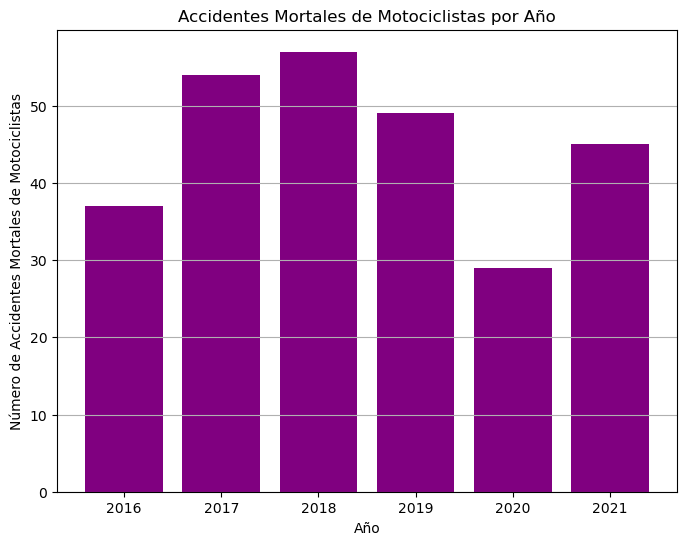

In [596]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(agnos, num_accidentes, color='purple')
plt.xlabel('Año')
plt.ylabel('Número de Accidentes Mortales de Motociclistas')
plt.title('Accidentes Mortales de Motociclistas por Año')
plt.xticks(agnos)  # Mostrar todos los años en el eje x
plt.grid(axis='y')  # Agregar una cuadrícula horizontal

# Mostrar el gráfico
plt.show()

In [597]:
resumen_anual = new_df_moto.groupby("Año_F")["Fallecido"].sum().reset_index()

In [598]:
# Se calcula la columna de accidentes mortales de moto.
resumen_anual["AMM"] = ((resumen_anual["Fallecido"].shift(1) - resumen_anual["Fallecido"]) / (resumen_anual["Fallecido"].shift(1)) * 100).fillna(0)
resumen_anual["AMM"] = round(resumen_anual["AMM"], 2)

In [599]:
resumen_anual.dropna(subset=['Año_F'], inplace=True)

In [600]:
resumen_anual

,Año_F,Fallecido,AMM
0,2016,37.0,0.00
1,2017,54.0,-45.95
2,2018,57.0,-5.56
3,2019,49.0,14.04
4,2020,29.0,40.82
5,2021,45.0,-55.17
6,2022,1.0,97.78
7,nan,0.0,100.00


Como se puede apreciar en la gráfica anterior, desde el 2016 hubo un aumento en las fatalidades en motocicleta,
posiblemente por al aumento del uso de este vehículo, hasta el 2019-2020, donde hubo un descenso seguramente por el confinamiento
COVID, ya luego, aumentando las fatalidades por el levantamiento de las restricciones.

In [601]:
df_motos.to_csv('KPI2.csv', index=False)

Tercera KPI:

Peatones fallecidos en accidentes de tránsito en las comunas de CABA.
Reducción en 20% de los accidentes en la comuna 1 (con mayor fatalidad).

In [602]:
# Unimos dataframes para encontrar COMUNA con los datos
new_df = pd.concat([df_hechos_m, df_heridos], axis=1)

In [603]:
new_df.columns

Index(['ID', 'N_VICTIMAS', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH',
       'LUGAR_DEL_HECHO', 'TIPO_DE_CALLE', 'Calle', 'Altura', 'Cruce',
       'Dirección Normalizada', 'COMUNA', 'XY (CABA)', 'pos x', 'pos y',
       'PARTICIPANTES', 'VICTIMA', 'ACUSADO', 'Población', 'ID_hecho', 'FECHA',
       'AAAA', 'MM', 'DD', 'ROL', 'VICTIMA', 'SEXO', 'EDAD',
       'FECHA_FALLECIMIENTO', 'Año_F', 'Semestre', 'Fallecido', 'Año'],
      dtype='object')

De acuerdo a las gráficas de los fallecidos en accidentes de tránsito de las comunas de CABA, la comuna 1 es la que tiene mayor mortalidad.
Su población de acuerdo a los años 2016 al 2021... en el 2010: 205.886; 2022: 223.282 habitantes (promedio entre 2010 y 2022: 214.584).
Datos extraídos desde la página de Censo de Argentina, años 2010, 2022 (no hay datos por todo el rango de años).

In [604]:
# Cambio Año_F a entero
new_df['Año_F'] = pd.to_numeric(new_df['Año_F'], errors='coerce').fillna(0).astype(int)

In [605]:
# Cambio Fallecido a entero
new_df['Fallecido'] = pd.to_numeric(new_df['Fallecido'], errors='coerce').fillna(0).astype(int)

In [606]:
# Calcular la tasa de mortalidad TAM para la comuna 1 durante los años
df_KPI3 = new_df[new_df["COMUNA"]==1]

In [607]:
# Relacionar Año, Fallecido y TAM de acuerdo a la comuna 1
resumen_año = df_KPI3.groupby(["Año_F"])["Fallecido"].sum().reset_index()
resumen_año["TAM"] = (resumen_año["Fallecido"]/214584)*1000000
resumen_año["TAM"] = round(resumen_año["TAM"], 2)
resumen_año

,Año_F,Fallecido,TAM
0,0,0,0.00
1,2016,15,69.90
2,2017,20,93.20
3,2018,15,69.90
4,2019,17,79.22
5,2020,9,41.94
6,2021,8,37.28


In [608]:
# Se genera una tabla con el cambio porcentual para contrastar resultados
resumen_año["Cambio_Porcentual"] = resumen_año["TAM"].pct_change() * 100
resumen_año["Cambio_Porcentual"] = round(resumen_año["Cambio_Porcentual"], 2)
resumen_año


,Año_F,Fallecido,TAM,Cambio_Porcentual
0,0,0,0.00,NaN
1,2016,15,69.90,inf
2,2017,20,93.20,33.33
3,2018,15,69.90,-25.00
4,2019,17,79.22,13.33
5,2020,9,41.94,-47.06
6,2021,8,37.28,-11.11


Por lo que se puede notar en el cambio porcentual de las fatalidades por accidentes de tránsito por cada 100.000 habitantes de la Comuna 1,
se produce una reducción en más del 20% en el 2018 y 2020, en el 2021, aunque hay una reducción, es menor, pero
se entiende que del 2018 al 2019-2020, hubo una situación donde se redujo la movilización por restricciones del COVID.

In [609]:
# Guardar Tabla para visualizar en PowerBI
resumen_año.to_csv('KPI3.csv', index=False)